In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sys

In [3]:
os.getcwd()

'/home/ec2-user/SageMaker/NNs'

In [4]:
from helper import get_data, get_data_big, plot_boundaries, draw_neural_net, return_weights_notation, plot_boundaries_keras

In [14]:
hidden_units = 3

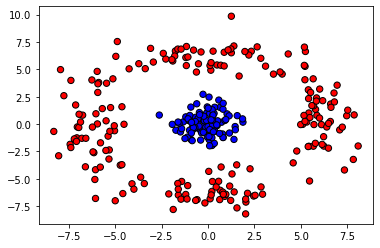

In [15]:
if hidden_units<=2:
    X, y = get_data() 
else:
    X, y = get_data_big()
plot_boundaries(X, y)

In [16]:
# !pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
activation = 'sigmoid' # linear, tanh, relu, tanh, sigmoid

In [18]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(2,), activation=activation))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import Adam, SGD
model.compile(Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X, y, epochs=100, verbose=0)

10/10 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000


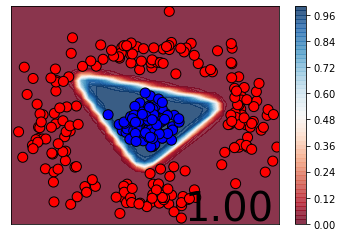

In [21]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict, h=0.5)

In [22]:
model.get_weights()

[array([[ 0.6954942, -2.8885486, -2.8806193],
        [ 2.5107014,  2.593405 , -1.5083374]], dtype=float32),
 array([-8.026664,  9.376023, -7.944671], dtype=float32),
 array([[-11.602612],
        [ 10.254058],
        [-11.79845 ]], dtype=float32),
 array([-4.6041], dtype=float32)]